In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
from keras.preprocessing.text import Tokenizer
import re
from nltk.stem import SnowballStemmer
import pickle

In [21]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')
cc_types_dict = {k: v for v, k in enumerate(cc_types)}

with open("../upsampled_train_val_test/upsampled_data_without_charades.pickle",'rb') as f:
    upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df = pickle.load(f)

# upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train_no_charade.csv")
# val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")
# test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")

tokenizer = Tokenizer(filters='"#$%&()*+/:;<=>?@[\]^_`{|}~')#exclude ! . , -
tokenizer.fit_on_texts(pd.concat([upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df])['clue'])

def addSpaceBeforePunct(s):
    s = re.sub('([.,!?()])', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

upsampled_input_cc_types_df = upsampled_input_cc_types_df.drop_duplicates()
# val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")
# test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")


inputs_X = tokenizer.texts_to_matrix(upsampled_input_cc_types_df['clue'])
val_X = tokenizer.texts_to_matrix(val_cc_types_df['clue'])
test_X = tokenizer.texts_to_matrix(test_cc_types_df['clue'])

inputs_Y = [cc_types_dict[val] for val in upsampled_input_cc_types_df['category'].values]
val_Y = [cc_types_dict[val] for val in val_cc_types_df['category'].values]
test_Y = [cc_types_dict[val] for val in test_cc_types_df['category'].values]


In [22]:
with open('dt.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [25]:
len(upsampled_input_cc_types_df)/(len(upsampled_input_cc_types_df) + len(val_cc_types_df) + len(test_cc_types_df))

0.6997924980047885

In [26]:
content.score(inputs_X,inputs_Y)

0.23041832033210163

In [10]:
content.score(val_X,val_Y)

0.23083067092651757

In [11]:
content.score(test_X,test_Y)

0.21723918575063614

In [12]:
val_pred = content.predict(val_X)

In [16]:
cnf_matrix = confusion_matrix(val_Y,val_pred)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[830  72  26 103 177 137  41  62 183  33 124  12  27]
 [102  16   4  14  54  15   3  34  29   6  10   2   7]
 [ 46   4   0   5  10   6   1   3  13   0   2   0   0]
 [199  14   4  44  35  24   9  14  66   8  22   1   7]
 [399  42  11  65 205  56  35  27 137  29  65  10   9]
 [172  21   7  46  56 107   7  13  58   5  15   8   6]
 [ 25   5   0   2   6   4   1   2   5   3   1   0   0]
 [ 60   5   1   9  16  10   5   6  27   2   5   1   0]
 [552  47  25  89 148  88  40  30 189  41  89   9  12]
 [  8   3   0   5   0   3   0   3   4   0   1   1   1]
 [192  22   3  19  34  15   7   7  31   4  29   1   6]
 [  0   1   0   1   1   0   0   0   0   0   0  18   0]
 [  5   0   0   1   1   0   0   0   0   1   1   0   0]]
Normalized confusion matrix
[[0.45 0.04 0.01 0.06 0.1  0.07 0.02 0.03 0.1  0.02 0.07 0.01 0.01]
 [0.34 0.05 0.01 0.05 0.18 0.05 0.01 0.11 0.1  0.02 0.03 0.01 0.02]
 [0.51 0.04 0. 

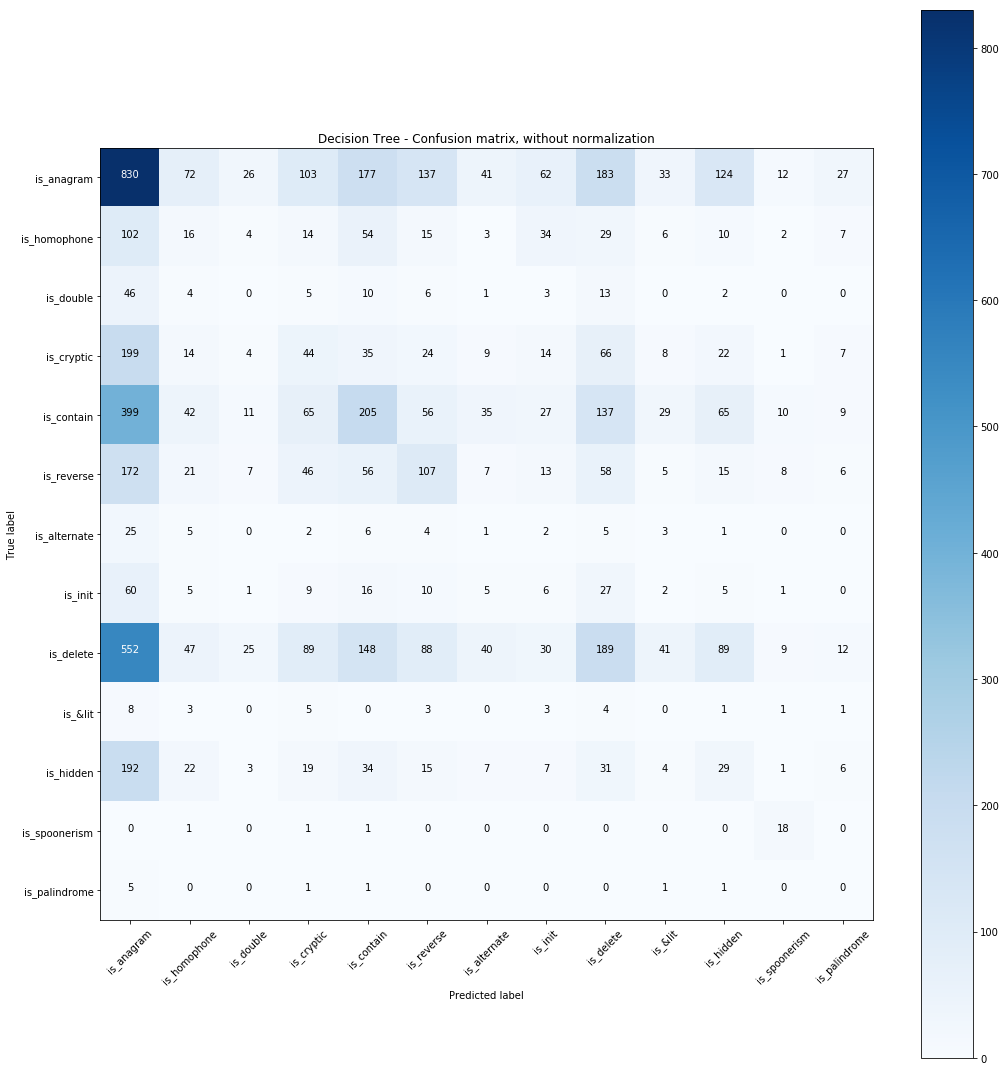

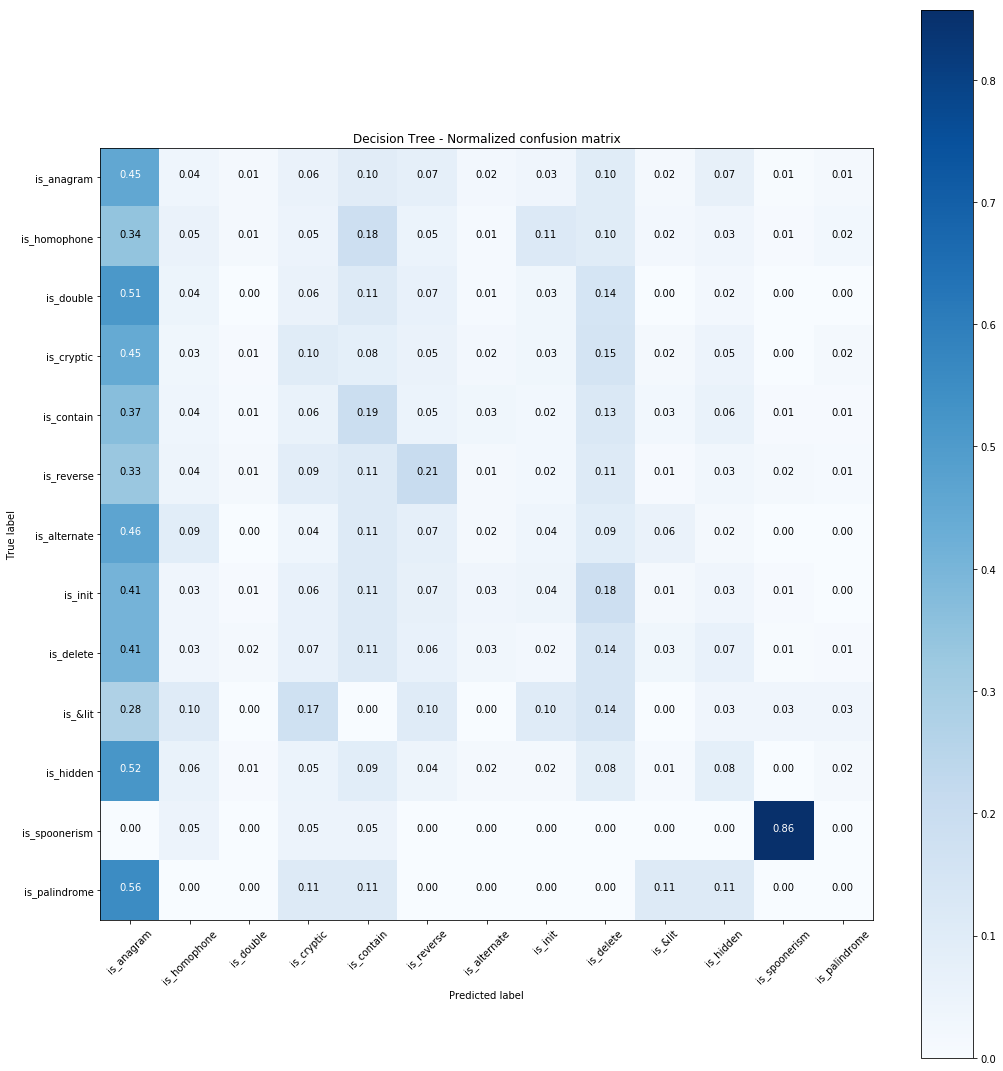

In [17]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

matplotlib.matplotlib_fname()

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree - Confusion matrix, without normalization')

plt.savefig("dt_unnormalized")
# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Decision Tree - Normalized confusion matrix')

plt.savefig("dt_normalized")

In [228]:
paths = content.decision_path(val_X)

In [260]:
paths = paths.toarray()

In [284]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [263]:
len(paths[0])

30169

In [274]:
from graphviz import Source
from sklearn import tree

In [277]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(content, out_file = dotfile)
dotfile.close()

In [279]:
content.score(val_X,val_Y)

0.5028465202741954

In [55]:
content.score(inputs_X,inputs_Y)

0.18678356986899564